In [1]:
from lib_reader.reader10.parse_grid_data import parse_grid_data_new
# from analysis_grid_data import cal_sipm_iv_vbr_data, plot_iv_vbr_curve

from addict import Dict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

/home/wqd/repo/python/grid_calibration/lib_reader/src/lib_reader/reader10/parity_check.py:27: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def crc16_xmodem_nd(data):
/home/wqd/repo/python/grid_calibration/lib_reader/src/lib_reader/reader10/parity_check.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def bcc_nd(data):


In [2]:
observe_name = '/home/wqd/repo/python/grid_calibration/data/10B/raw_data/tb_data/148_observe_10C_287.dat'
hk_name = observe_name.replace('observe', 'hk')

In [3]:
wf_data_l = Dict(parse_grid_data_new(observe_name,data_tag='grid1x_wf_packet',endian='MSB')[0])
hk_data = Dict(parse_grid_data_new(hk_name,data_tag='hk_grid1x_packet',endian='MSB')[0])

========> parsing file  /home/wqd/repo/python/grid_calibration/data/10B/raw_data/tb_data/148_observe_10C_287.dat
                 name  start  size  len
0              header      0     4    1
1                 utc      4     4    1
2         pps_for_utc      8     4    1
3   timestamp_for_pps     12     8    1
4           channel_n     20     2    1
5        event_number     22     4    1
6       sample_length     26     2    1
7       waveform_data     28     2  256
8           timestamp    540     8    1
9            data_max    548     2    1
10          data_base    550     2    1
11                CRC    554     2    1
12               tail    556     4    1
========> parsing file  /home/wqd/repo/python/grid_calibration/data/10B/raw_data/tb_data/148_hk_10C_287.dat
             name  start  size  len
0          header      0     4    1
1        utc_time      4     4    1
2       fee_z5v_v      8     2    1
3       fee_z5v_i     10     2    1
4      fee_z2v1_v     12     2    1
5  

ch0 count: 98147
ch1 count: 99100
ch2 count: 100602
ch3 count: 17714


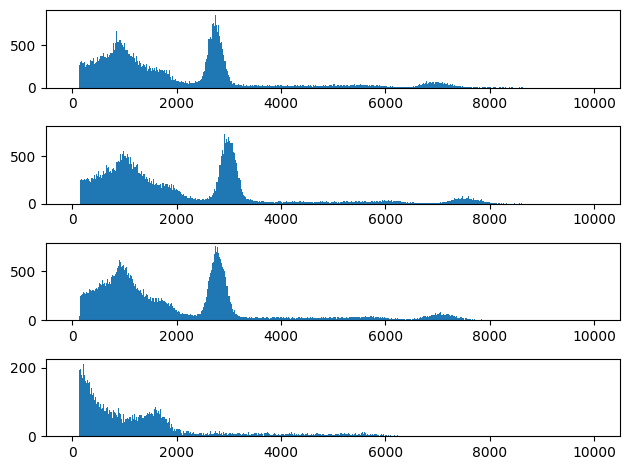

In [6]:
# Spectrum plotting code by PXF
bin_width = 10
range_min = 0
range_max = 10000

bins = range(range_min, range_max, bin_width)

fig,axs = plt.subplots(4)
counts0, bins, patches = axs[0].hist(wf_data_l.data_max[wf_data_l.channel_n==0][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts1, bins, patches = axs[1].hist(wf_data_l.data_max[wf_data_l.channel_n==1][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts2, bins, patches = axs[2].hist(wf_data_l.data_max[wf_data_l.channel_n==2][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts3, bins, patches = axs[3].hist(wf_data_l.data_max[wf_data_l.channel_n==3][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)

# axs[0].set_xlim(0,1000)
# axs[1].set_xlim(0,1000)
# axs[2].set_xlim(0,1000)
# axs[3].set_xlim(0,1000)

# axs[0].set_ylim(0,2000)
# axs[1].set_ylim(0,2000)
# axs[2].set_ylim(0,2000)
# axs[3].set_ylim(0,10000)

plt.tight_layout()
print('ch0 count: {:d}'.format(int(sum(counts0[:]))))
print('ch1 count: {:d}'.format(int(sum(counts1[:]))))
print('ch2 count: {:d}'.format(int(sum(counts2[:]))))
print('ch3 count: {:d}'.format(int(sum(counts3[:]))))

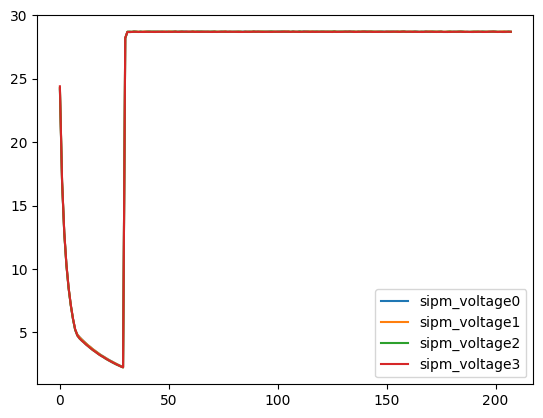

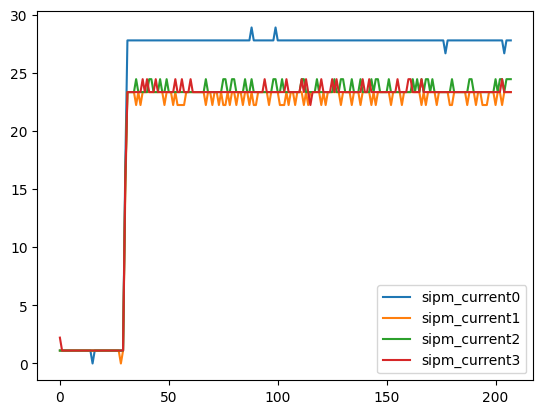

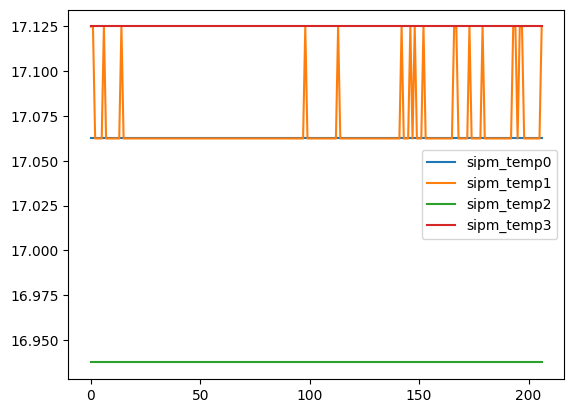

In [5]:
plt.plot(20.57*2.5*hk_data.sipm_voltage0[:]/4096 - 499*2.5*hk_data.sipm_current0[:]/4096/548.88)
plt.plot(20.57*2.5*hk_data.sipm_voltage1[:]/4096 - 499*2.5*hk_data.sipm_current1[:]/4096/548.88)
plt.plot(20.57*2.5*hk_data.sipm_voltage2[:]/4096 - 499*2.5*hk_data.sipm_current2[:]/4096/548.88)
plt.plot(20.57*2.5*hk_data.sipm_voltage3[:]/4096 - 499*2.5*hk_data.sipm_current3[:]/4096/548.88)
plt.legend(['sipm_voltage0','sipm_voltage1','sipm_voltage2','sipm_voltage3'])
plt.show()

plt.plot(2.5*hk_data.sipm_current0[:]/4096/548.88 * 1000_000)
plt.plot(2.5*hk_data.sipm_current1[:]/4096/548.88 * 1000_000)
plt.plot(2.5*hk_data.sipm_current2[:]/4096/548.88 * 1000_000)
plt.plot(2.5*hk_data.sipm_current3[:]/4096/548.88 * 1000_000)
plt.legend(['sipm_current0','sipm_current1','sipm_current2','sipm_current3'])
plt.show()

plt.plot(hk_data.sipm_temp0[1:]/16./16.)
plt.plot(hk_data.sipm_temp1[1:]/16./16.)
plt.plot(hk_data.sipm_temp2[1:]/16./16.)
plt.plot(hk_data.sipm_temp3[1:]/16./16.)
plt.legend(['sipm_temp0','sipm_temp1','sipm_temp2','sipm_temp3'])
plt.show()
